<a href="https://colab.research.google.com/github/Gabriele90/ML-in-medical-imaging/blob/main/Ensemble_model_Alzheimer's_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Introduction***

In this study, I aimed to present the use of deep learning for the high-accuracy detection of Alzheimer's disease condition using MRI images. Publicly available MRI images were used in the experiment, which involved the training of deep learning and machine learning classifiers. 

In this study I propose a system performing detection and classification of Mri brain images by making an integrated stacking ensemble model of pre-trained networks like InceptionV3, MobileNetV2, and Xception in Tensorflow.

***Importing Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.utils import to_categorical
from keras import optimizers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

from tensorflow.keras.metrics import Metric

import cv2
import random
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator

***Importing the dataset***

The data consists of MRI images. The data has four classes of images both in training as well as a testing set:

Mild Demented

Moderate Demented

Non Demented

Very Mild Demented

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Alzheimer_s Dataset'):
    for filename in filenames:
        os.path.join(dirname, filename)

**Setting the working directories**

In [ ]:
main_dir = "/content/drive/MyDrive/Alzheimer_s Dataset"
#set the path to the train dir
train_dir = os.path.join(main_dir,'train')
#set the path to the test dir
test_dir = os.path.join(main_dir,'test')
#directory with the training Mild demented images
train_mild_dir = os.path.join(train_dir, 'MildDemented')
#directory with the training very milded images
train_verymild_dir = os.path.join(train_dir, 'VeryMildDemented')
#directory with the training Moderate demented images
train_moderate_dir = os.path.join(train_dir, 'ModerateDemented')
#directory with the training no demented images
train_nodement_dir = os.path.join(train_dir, 'NonDemented')
#directory with the test Mild demented images
test_mild_dir = os.path.join(test_dir, 'MildDemented')
#directory with the test very milded images
test_verymild_dir = os.path.join(test_dir, 'VeryMildDemented')
#directory with the test Moderate demented images
test_moderate_dir = os.path.join(test_dir, 'ModerateDemented')
#directory with the test no demented images
test_nodement_dir = os.path.join(test_dir, 'NonDemented')

In [ ]:
train_mild_names = os.listdir(train_mild_dir)
print(train_mild_names[:5])

train_verymild_names = os.listdir(train_verymild_dir)
print(train_verymild_names[:5])

train_moderate_names = os.listdir(train_moderate_dir)
print(train_moderate_names[:5])

train_nodement_names = os.listdir(train_nodement_dir)
print(train_nodement_names[:5])

test_mild_names = os.listdir(test_mild_dir)
print(test_mild_names[:5])

test_verymild_names = os.listdir(test_verymild_dir)
print(train_verymild_names[:5])

test_moderate_names = os.listdir(test_moderate_dir)
print(test_moderate_names[:5])

test_nodement_names = os.listdir(test_nodement_dir)
print(test_nodement_names[:5])

['mildDem105.jpg', 'mildDem10.jpg', 'mildDem103.jpg', 'mildDem107.jpg', 'mildDem116.jpg']
['verymildDem1567.jpg', 'verymildDem1554.jpg', 'verymildDem157.jpg', 'verymildDem1539.jpg', 'verymildDem1534.jpg']
['moderateDem17.jpg', 'moderateDem24.jpg', 'moderateDem15.jpg', 'moderateDem1.jpg', 'moderateDem23.jpg']
['nonDem2411.jpg', 'nonDem2378.jpg', 'nonDem2372.jpg', 'nonDem2381.jpg', 'nonDem2374.jpg']
['26 (19).jpg', '28 (12).jpg', '28 (10).jpg', '27 (7).jpg', '27 (26).jpg']
['verymildDem1567.jpg', 'verymildDem1554.jpg', 'verymildDem157.jpg', 'verymildDem1539.jpg', 'verymildDem1534.jpg']
['28.jpg', '29.jpg', '28 (2).jpg', '31.jpg', '27 (2).jpg']
['26 (63).jpg', '26 (67).jpg', '26 (100).jpg', '26 (62).jpg', '26 (64).jpg']


***Data visualization***

In [ ]:
#print the total no of images present in each dir
print("Total images in the training set:", len(train_mild_names+train_verymild_names+train_nodement_names+train_moderate_names))
print("Total images in the test set:", len(test_mild_names+test_verymild_names+train_nodement_names+train_moderate_names))

Total images in the training set: 3451
Total images in the test set: 1751


In [ ]:
#get the filenames from the covid & normal dir of the train dataset
mild_pic =[os.path.join(train_mild_dir, filename) for filename in train_mild_names[0:4]]
verymild_pic =[os.path.join(train_verymild_dir, filename) for filename in train_verymild_names[0:4]]
moderate_pic =[os.path.join(train_moderate_dir, filename) for filename in train_moderate_names[0:4]]
nodement_pic =[os.path.join(train_nodement_dir, filename) for filename in train_nodement_names[0:4]]

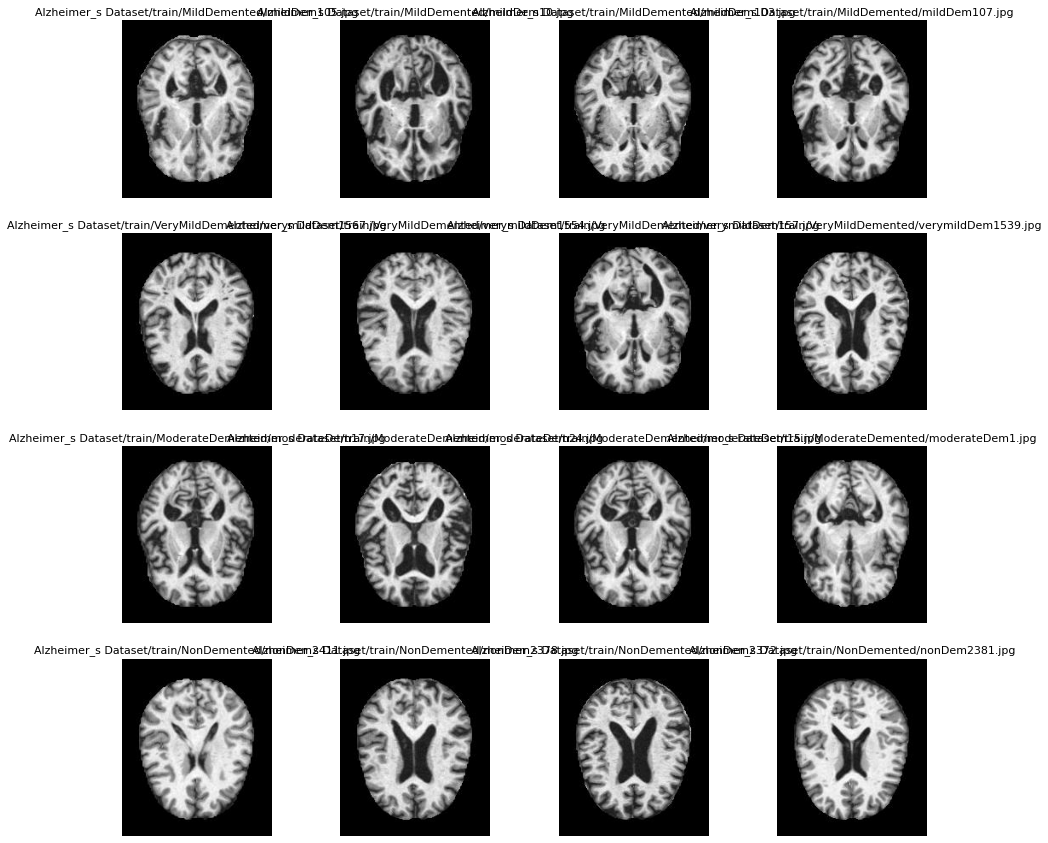

In [ ]:
import matplotlib.pyplot as plt
# plot a grid of 16 images (2 images of each class)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(15,15)
#merge the covid and normal list
merged_list = mild_pic+verymild_pic+moderate_pic+nodement_pic
for i , img_path in enumerate(merged_list):
  data= img_path.split('/', 4)[4]
  sp = plt.subplot(rows, cols, i + 1 )
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=11)
  plt.imshow(img,cmap='gray')

  plt.show

***Image Resizing***

 I use cv2.resize() from the ‘cv2’ library, to have all images of the same dimension (224 x 224).

In [ ]:
x = []
y = []

for i in tqdm(os.listdir(train_mild_dir)):
    path = os.path.join(train_mild_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Mild')

for i in tqdm(os.listdir(train_verymild_dir)):
    path = os.path.join(train_verymild_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Very mild')

for i in tqdm(os.listdir(train_moderate_dir)):
    path = os.path.join(train_moderate_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Moderated')   

for i in tqdm(os.listdir(train_nodement_dir)):
    path = os.path.join(train_nodement_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('No dementia')

100%|██████████| 1072/1072 [07:12<00:00,  2.48it/s]


In [ ]:
for i in tqdm(os.listdir(test_mild_dir)):
    path = os.path.join(test_mild_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Mild')

for i in tqdm(os.listdir(test_verymild_dir)):
    path = os.path.join(test_verymild_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Very mild')

for i in tqdm(os.listdir(test_moderate_dir)):
    path = os.path.join(test_moderate_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Moderated')   

for i in tqdm(os.listdir(test_nodement_dir)):
    path = os.path.join(test_nodement_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('No dementia')

100%|██████████| 640/640 [04:20<00:00,  2.46it/s]


***Data dimension and class label encoding***

In [ ]:
x = np.array(x)
y = np.array(y)
x.shape,y.shape

((4730, 224, 224, 3), (4730,))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


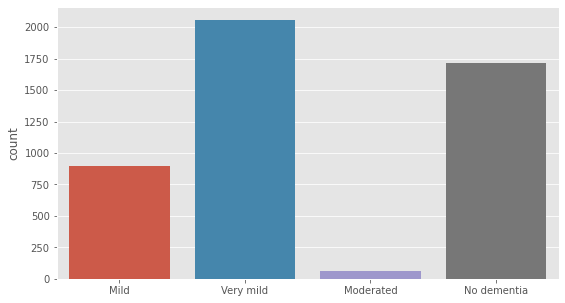

In [ ]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y)
plt.show()

**HotLabel encoding**

I assign to each categories a number, in order to train the neural network properly.

In [ ]:
y

array(['Mild', 'Mild', 'Mild', ..., 'No dementia', 'No dementia',
       'No dementia'], dtype='<U11')

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
y = to_categorical(y)#num_classes = 4
y.shape

(4730, 4)

In [ ]:
from sklearn.utils import shuffle
x,y = shuffle(x,y)

***Data splitting***

When developing a deep learning-based
method, using a rigorous evaluation process is essential
to avoid overfitting to training data or the generation of
fake information. In order to evaluate the performance of
the network, it is generally recommended to split data into
training, valid, and test sets. The training set data are used
to determine the network parameters. In most cases, the
network shows good performance for the training set after

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
y_test.shape

(946, 4)

***Data Augmentation***

The amount of data gathered was very low and could cause the models to under-fit. Hence, we would use a brilliant technique of Data Augmentation to increase the amount of data. This technique relies on rotations, flips, change in exposure, etc to create similar images. Using this technique we can increase the size of data by a high factor.
The output image of the cropping stage is given as input to ImageDataGenerator which is a function in keras.preprocessing.image library. This function takes multiple arguments that decide how Augmentation takes place.

In [ ]:
img_size=224
train_datagen = ImageDataGenerator(rotation_range=30,height_shift_range=0.2,
                                  zoom_range = 0.3,horizontal_flip=True)#rescale=(1./255),
test_datagen = ImageDataGenerator()#rescale=(1./255)

train_gen = train_datagen.flow_from_directory(directory = train_dir,target_size=(img_size,img_size),class_mode ="categorical",
                                              batch_size=32)
test_gen = test_datagen.flow_from_directory(directory = test_dir,target_size=(img_size,img_size),class_mode ="categorical",
                                              batch_size=32)

Found 3451 images belonging to 4 classes.
Found 1279 images belonging to 5 classes.


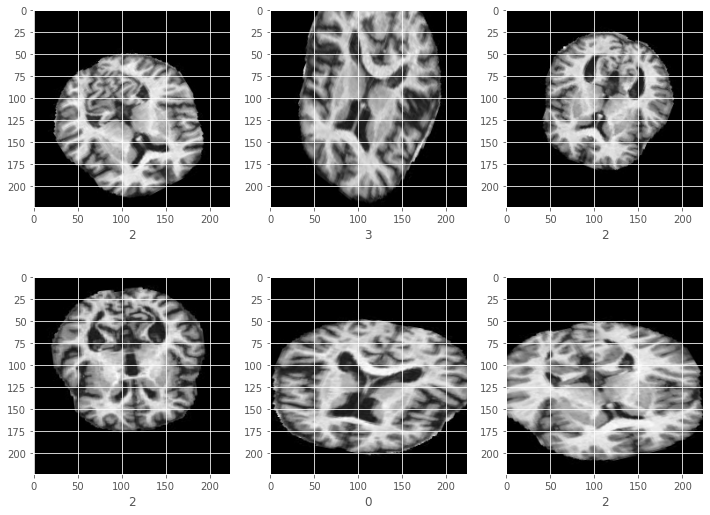

In [ ]:
from tensorflow.keras.preprocessing import image
sample_x,sample_y = next(train_gen)
plt.figure(figsize=(12,9))
for i in range(6):
    plt.subplot(2,3,i+1)
    sample = image.array_to_img(sample_x[i])
    plt.xlabel(np.argmax(sample_y[i]))
    plt.imshow(sample)
plt.show()

In [ ]:
#get the class indices
train_gen.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [ ]:
#get the image shape
train_gen.image_shape

(224, 224, 3)

**Creating the Ensemble Model**

Our first task would be to create all the individual models. I will be creating three different models using MobileNetV2, InceptionV3, and Xception. Creating a model using a pre-trained network is very easy in Tensorflow. We need to load the weights, decide whether to freeze or unfreeze the loaded weights, and finally add Dense layers to make the output how we want. The basic structure I will be using for my models.

In [ ]:
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def create_model(base_model):
    base_model.trainable = True
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    prediction_layer = tf.keras.layers.Dense(4, activation='softmax')(global_average_layer)
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics='categorical_accuracy')
    return model

In [ ]:
batch_size = 32
epochs = 50
def fit_model(model):
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs, 
                        validation_data=(x_test, y_test)
                        )
    return history

In [ ]:
IMG_SHAPE = (224, 224, 3)
base_model1 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model2 = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model3 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
model1 = create_model(base_model1)
model2 = create_model(base_model2)
model3 = create_model(base_model3)
history1 = fit_model(model1)
model1.save('models/model1.h5')
history2 = fit_model(model2)
model2.save('models/model2.h5')
history3 = fit_model(model3)
model3.save('models/model3.h5')

83689472/83683744 [==============================] - 1s 0us/step
Epoch 1/50
119/119 [==============================] - 61s 208ms/step - loss: 1.0170 - categorical_accuracy: 0.5747 - val_loss: 1.9698 - val_categorical_accuracy: 0.3224
Epoch 2/50
119/119 [==============================] - 23s 194ms/step - loss: 0.2691 - categorical_accuracy: 0.9258 - val_loss: 2.0704 - val_categorical_accuracy: 0.3658
Epoch 3/50
119/119 [==============================] - 23s 194ms/step - loss: 0.0689 - categorical_accuracy: 0.9902 - val_loss: 1.4169 - val_categorical_accuracy: 0.4419
Epoch 4/50
119/119 [==============================] - 23s 197ms/step - loss: 0.0221 - categorical_accuracy: 0.9976 - val_loss: 1.4330 - val_categorical_accuracy: 0.4545
Epoch 5/50
119/119 [==============================] - 24s 200ms/step - loss: 0.0282 - categorical_accuracy: 0.9943 - val_loss: 1.6195 - val_categorical_accuracy: 0.4736
Epoch 6/50
119/119 [==============================] - 24s 199ms/step - loss: 0.0184 - cate

***Plotting accuracy and loss***

In [ ]:
def plot_history(history):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

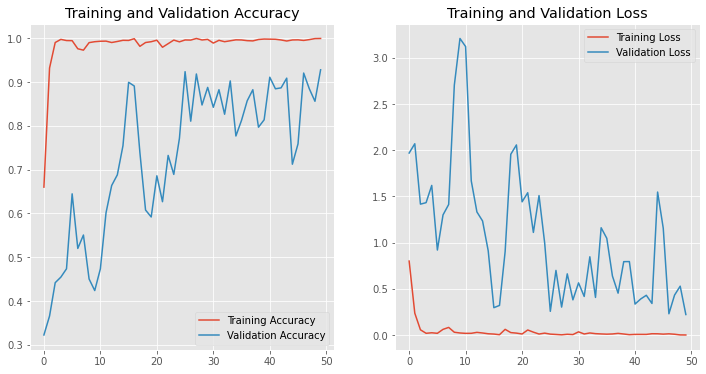

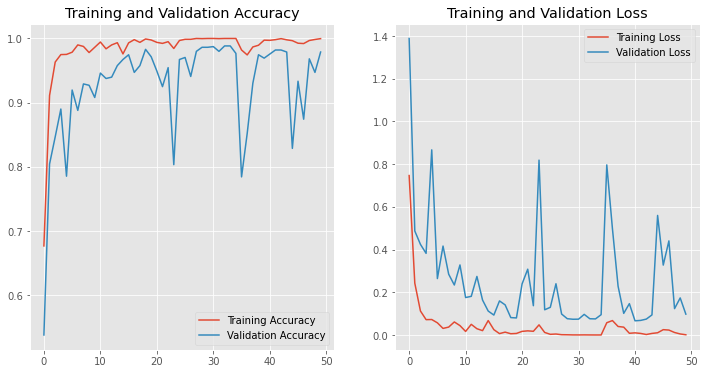

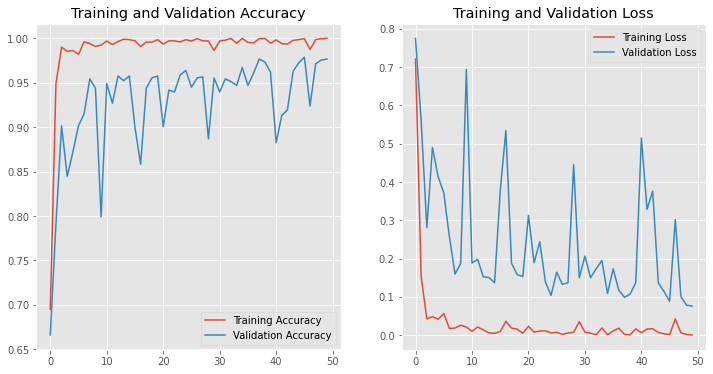

In [ ]:
plot_history(history1)
plot_history(history2)
plot_history(history3)

The results are not at all bad but we will still improve them.

**Load the Model and Freeze its Layers**

Our next step is to load the models we have just created above and freeze their layers so that their weights are not altered when we fit our ensemble model on them.

In [ ]:
def load_all_models():
    all_models = []
    model_names = ['model1.h5', 'model2.h5', 'model3.h5']
    for model_name in model_names:
        filename = os.path.join('models', model_name)
        model = tf.keras.models.load_model(filename)
        all_models.append(model)
        print('loaded:', filename)
    return all_models

**Concatenate their outputs and add Dense Layers**

Take the outputs of all the models and put them in a concatenation layer. Then add a Dense layer with some units followed by a Dense layer with a single output and an activation equal to “softmax” as our task is a categorical classification. This can be thought of as an ANN where the predictions of all the models are taken as inputs and an output is provided.

In [ ]:
import keras.backend as K

from tensorflow.keras.metrics import Metric

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
def ensemble_model(models):
    for i, model in enumerate(models):
        for layer in model.layers:
          layer.trainable = False
          ensemble_visible = [model.input for model in models]
          ensemble_outputs = [model.output for model in models]
          merge = tf.keras.layers.concatenate(ensemble_outputs)
          merge = tf.keras.layers.Dense(10, activation='relu')(merge)
          output = tf.keras.layers.Dense(4, activation='softmax')(merge)
          model = tf.keras.models.Model(inputs=ensemble_visible, outputs=output)
          model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics = METRICS)
          
          return model

In [ ]:
models = load_all_models()
model = ensemble_model(models)

loaded: models/model1.h5
loaded: models/model2.h5
loaded: models/model3.h5


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'Ensemble-model.png', show_shapes=True)

Training the ensemble model

We cannot train the ensemble model normally by just passing the dataset like how we trained our individual models. Inputs are required at three places while only one output is generated. So we will need to configure our X values like that.

In [ ]:
X = [x_train for _ in range(len(model.input))]
X_1 = [x_test for _ in range(len(model.input))]

In [ ]:
epochs = 50
history = model.fit(X, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_1, y_test),
                    )

Epoch 1/50
119/119 [==============================] - 146s 1s/step - loss: 1.8160 - categorical_accuracy: 0.0075 - precision: 0.0205 - recall: 9.7248e-04 - auc: 0.2285 - f1_score: 0.0018 - val_loss: 1.5874 - val_categorical_accuracy: 0.0486 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.3637 - val_f1_score: 0.0000e+00
Epoch 2/50
119/119 [==============================] - 129s 1s/step - loss: 1.3572 - categorical_accuracy: 0.2024 - precision: 0.3386 - recall: 0.0022 - auc: 0.6234 - f1_score: 0.0042 - val_loss: 1.3098 - val_categorical_accuracy: 0.3552 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6663 - val_f1_score: 0.0000e+00
Epoch 3/50
119/119 [==============================] - 129s 1s/step - loss: 1.2090 - categorical_accuracy: 0.5400 - precision: 0.9167 - recall: 6.9332e-04 - auc: 0.8015 - f1_score: 0.0013 - val_loss: 1.1989 - val_categorical_accuracy: 0.6501 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8576 - val_f1_score

In [ ]:
def plot_history(history):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    
    plt.show()

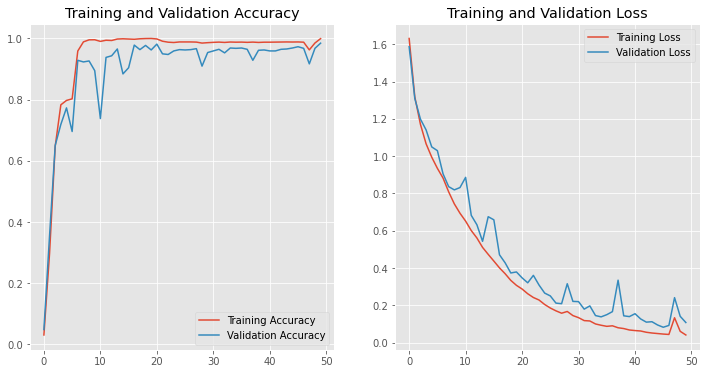

In [ ]:
plot_history(history)

In [ ]:
print('MobileNetV2 acc:', history1.history['val_categorical_accuracy'][-1])
print('InceptionV3 acc:', history2.history['val_categorical_accuracy'][-1])
print('Xception acc:', history3.history['val_categorical_accuracy'][-1])

MobileNetV2 acc: 0.9281184077262878
InceptionV3 acc: 0.9788583517074585
Xception acc: 0.9767441749572754


In [ ]:
print('Ensemble acc:', history.history['val_categorical_accuracy'][-1])

Ensemble acc: 0.9841437339782715


As we can see, we got an overall val_categorical_accuracy, and val_loss better with the Ensemble model with a score of 98%.

***Classification Report***

We evaluate Pecision, Recall, F1score, and Support for the five models.

In [ ]:
y_pred= model.predict(X_1)
y_pred = np.argmax(y_pred,axis=1)
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)
y_test_new = np.argmax(y_test,axis=1)

[0 1 2 3] [167  19 351 409]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       170
           1       1.00      1.00      1.00        19
           2       0.99      0.98      0.98       352
           3       0.98      0.99      0.98       405

    accuracy                           0.98       946
   macro avg       0.99      0.99      0.99       946
weighted avg       0.98      0.98      0.98       946



As we can see, we have great scores for all metrics with a score next to 100%.

***Confusion Matrix***

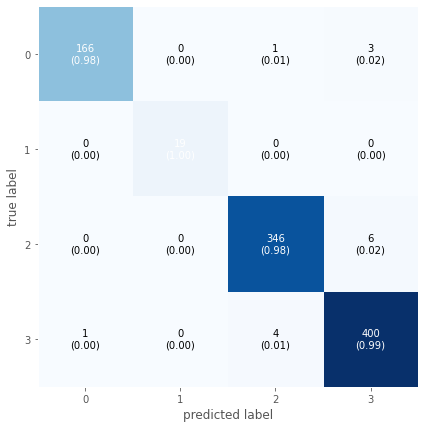

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test_new,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),
                     show_normed=True);

As we can see, we got excellent scores using the EfficientNetBo.

***Model Performance***

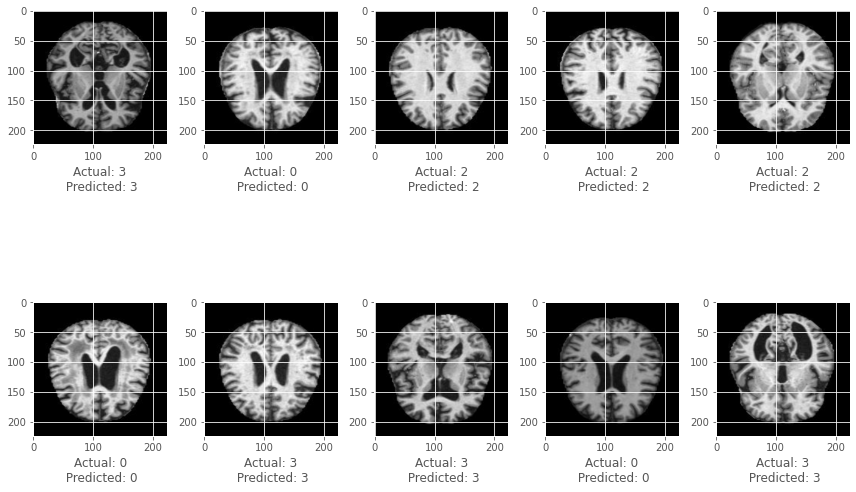

In [ ]:
plt.figure(figsize=(12,9))
for i in range(10):
    sample_idx = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[sample_idx])
    plt.xlabel(f"Actual: {y_test_new[sample_idx]}\n Predicted: {y_pred[sample_idx]}")
    
plt.tight_layout()
plt.show()

As we can see, each predicted MRI corresponds to the actual ones.